<a href="https://colab.research.google.com/github/marcojr93/i2a2_desafios_projetos/blob/main/Desafio%201%20-%20Analise%20de%20sensores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 1 - I2A2 - ABDI

**As regras do jogo**

A planilha contém 17 sensores e 8 equipamentos.

*   Um dos equipamentos está com defeito.
*   A tarefa de vocês é descobrir qual é o equipamento defeituoso

Importante, quero o equipamento, e não o sensor que está alarmando o defeito

# Preparação do dataset

In [1]:
# Primeiramente é necessário importar as bilbiotecas que serão utilizadas ao longo da análise

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
     

Os dados mostrados na tabela abaixo foram disponibilizados via planilha em Excel e com eles, faremos nossa análise

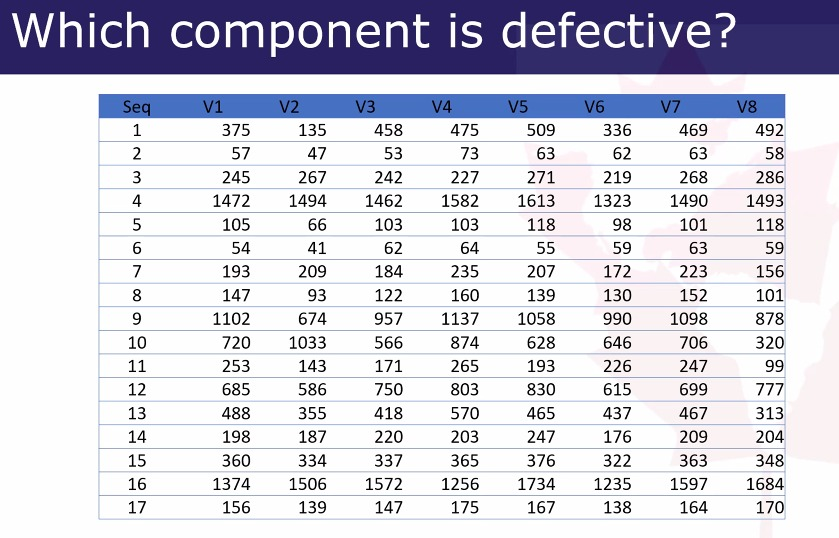

In [5]:
# Carregando o dataset em Excel

df = pd.read_excel('defective_equipment.xlsx')
display(df)

,Seq,V1,V2,V3,V4,V5,V6,V7,V8
0,1,375,135,458,475,509,336,469,492
1,2,57,47,53,73,63,62,63,58
2,3,245,267,242,227,271,219,268,286
3,4,1472,1494,1462,1582,1613,1323,1490,1493
4,5,105,66,103,103,118,98,101,118
5,6,54,41,62,64,55,59,63,59
6,7,193,209,184,235,207,172,223,156
7,8,147,93,122,160,139,130,152,101
8,9,1102,674,957,1137,1058,990,1098,878
9,10,720,1033,566,874,628,646,706,320


In [6]:
# Para melhor entendimento da planilha, vamos renomear a linha 1, que corresponde aos equipamentos. Assim, cada "V" corresponde a um equipamento e serão abreviados de Eq

# Para renomear todos de uma forma mais rápida, utilizaremos a função rename do Pandas, criando uma lista chamada Mapa para realizar a mudança de uma forma mais rápida

mapa = {
    "V1" : "Eq1",
    "V2" : "Eq2",
    "V3" : "Eq3",
    "V4" : "Eq4",
    "V5" : "Eq5",
    "V6" : "Eq6",
    "V7" : "Eq7",
    "V8" : "Eq8"
}

df = df.rename(columns = mapa)


In [7]:
# Verificando como ficou o dataset após modificação

display(df)

,Seq,Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8
0,1,375,135,458,475,509,336,469,492
1,2,57,47,53,73,63,62,63,58
2,3,245,267,242,227,271,219,268,286
3,4,1472,1494,1462,1582,1613,1323,1490,1493
4,5,105,66,103,103,118,98,101,118
5,6,54,41,62,64,55,59,63,59
6,7,193,209,184,235,207,172,223,156
7,8,147,93,122,160,139,130,152,101
8,9,1102,674,957,1137,1058,990,1098,878
9,10,720,1033,566,874,628,646,706,320


In [8]:
# A coluna "Seq" não vai influenciar na análise, iremos excluir do dataset

df = df.drop(['Seq'], axis =1)
display(df)

,Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8
0,375,135,458,475,509,336,469,492
1,57,47,53,73,63,62,63,58
2,245,267,242,227,271,219,268,286
3,1472,1494,1462,1582,1613,1323,1490,1493
4,105,66,103,103,118,98,101,118
5,54,41,62,64,55,59,63,59
6,193,209,184,235,207,172,223,156
7,147,93,122,160,139,130,152,101
8,1102,674,957,1137,1058,990,1098,878
9,720,1033,566,874,628,646,706,320


# Análise exploratória de dados

In [21]:
# Podemos ter uma análise geral dos dados através da função describe, que dá uma
# visão geral do dataset e algumas informações estatísticas

df.describe()

,Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,469.647059,429.941176,460.235294,503.941176,510.176471,422.588235,492.882353,444.470588
std,452.701466,479.896014,469.595907,463.859282,517.552562,405.843267,480.721448,491.302748
min,54.000000,41.000000,53.000000,64.000000,55.000000,59.000000,63.000000,58.000000
25%,156.000000,135.000000,147.000000,175.000000,167.000000,138.000000,164.000000,118.000000
50%,253.000000,209.000000,242.000000,265.000000,271.000000,226.000000,268.000000,286.000000
75%,685.000000,586.000000,566.000000,803.000000,628.000000,615.000000,699.000000,492.000000
max,1472.000000,1506.000000,1572.000000,1582.000000,1734.000000,1323.000000,1597.000000,1684.000000


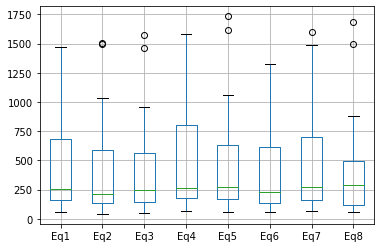

In [25]:
# A tabela não consegue trazer muita informação útil nem mesmo é possível destacar padrões de forma prática,
# portanto, podemos modificar essa avaliação por meio de boxplot.

boxplot = df.boxplot(column=['Eq1', 'Eq2', 'Eq3', 'Eq4', 'Eq5', 'Eq6', 'Eq7', 'Eq8']) 

In [29]:
# Após a plotagem do BoxPlot, vemos que o Eq4 possui valores Máximos bem maiores que os demais
# porém, se tratando de ume equipamento e avaliando que o todos são de mesma fabricante
# e aplicação, podemos entender que esses valores de pico, podem ser casuais e referentes
# à determinadas situações, como por exemplo uma partida do equipamento ou uma mudança brusca
# no processo. Podemos avaliar se esses picos influenciam na operação do equipamento ao longo do tempo

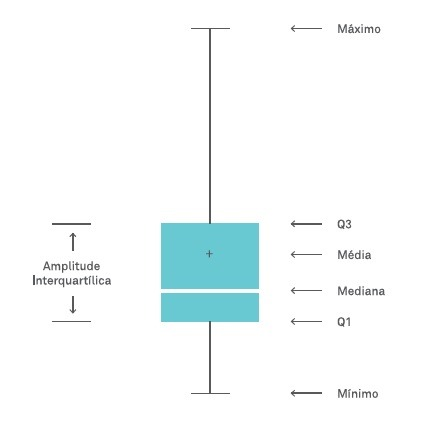

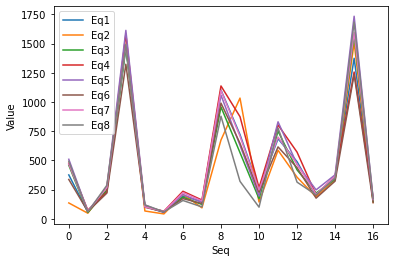

In [30]:
# Para isso, podemos fazer essa análise é por meio de análise gráfica, 
# assim faremos um plot de todos os equipamentos com os valores de todos os 
# sensores, para avaliar se visualmente teremos algum equipamento se comportando
# fora do padrão.

for i in df.columns:
    plt.plot(df[i], label=str(i))
    plt.legend()
plt.xlabel('Seq')
plt.ylabel('Value')
plt.show()

In [19]:
# O Eq2 visualmente destoa do restante dos sensores, principalmente entre 
# os dados coletados entre os sensores 7 e 10

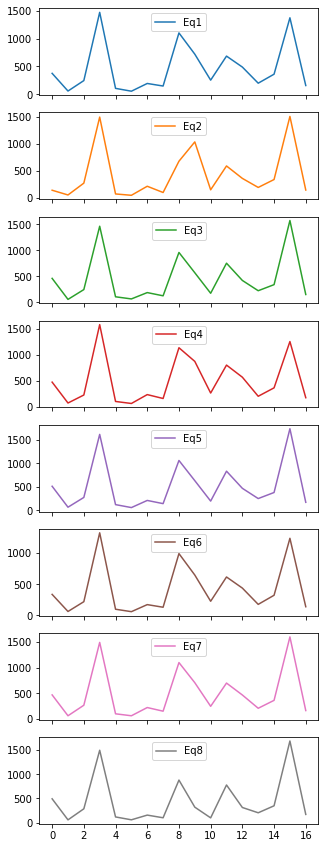

In [18]:
# Plotagem dos gráficos de forma separadas para verificar se de fato existe 
# uma diferença entre os demais.

df.plot(subplots =True, sharex = True, figsize = (5,15));

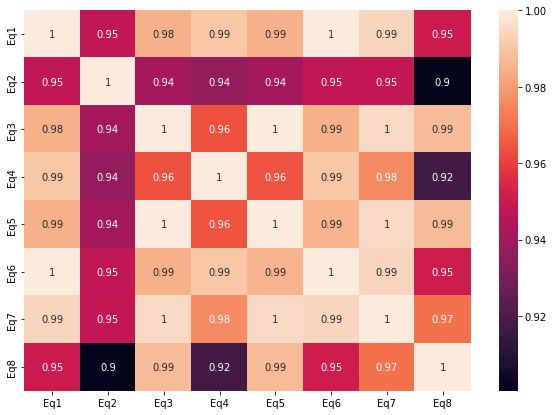

In [17]:
# Uma outra forma de visualizar o a diferença do Eq2 em relação aos demais é 
# avaliando a matriz de correção dos dados dos sensores. Assim, quanto menor a
# correção entres os valores, mais dicrepante em relação ao padrão ele está.

f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Considerações finais

Por mais que haja picos de valores coletados por sensores, eles não alteram o padrão de funcionamento do equipamento como aconteceu com Eq4, portanto aoncluímos que o Eq2, ou equipamento 2, é o equipamento defeituoso, o mesmo apresenta um padrão visual de operação diferente dos demais equipamentos nos valores captados pelos sensores 7, 8, 9 e 10.

A matriz de correção reforça a teoria de que os valores coletados pelos sensores do Eq2 estão destoando dos demais equipamentos conforme a imagem abaixo.



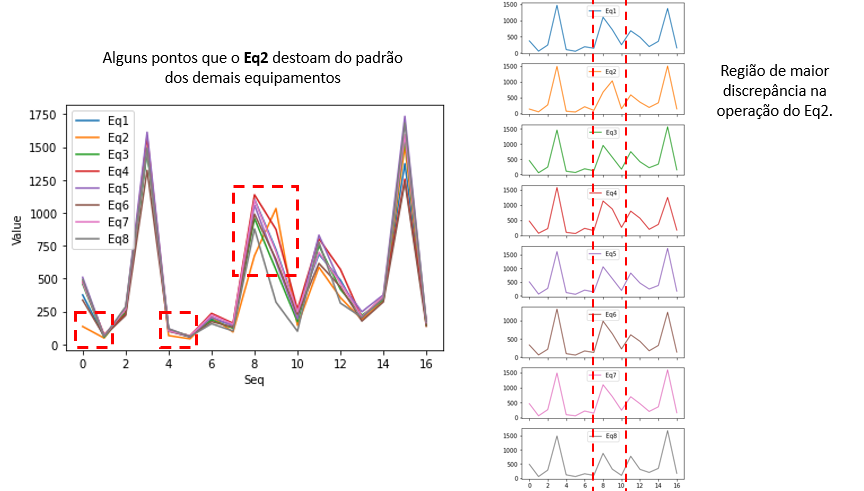